# Questão 1

In [1]:
import pandas as pd
from urllib.request import Request, urlopen

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tivemos que fazer isso porque quando tentamos ler direto o link usando o read_csv(), 
# retornava um erro 403 - Forbidden do Http, então fizemos essa request mandando esse header, e funcionou
csv = Request('https://www.w3resource.com/python-exercises/pandas/filter/world_alcohol.csv')
csv.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36')
content = urlopen(csv)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------

df = pd.read_csv(content)
df

,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62
3,1986,Americas,Colombia,Beer,4.27
4,1987,Americas,Saint Kitts and Nevis,Beer,1.98
...,...,...,...,...,...
95,1984,Africa,Niger,Other,0.00
96,1985,Europe,Luxembourg,Wine,7.38
97,1984,South-East Asia,Indonesia,Wine,0.00
98,1984,Africa,Equatorial Guinea,Wine,0.00


# 1 a

In [24]:
df.groupby('Beverage Types').first()

,Year,WHO region,Country,Display Value
Beverage Types,,,,
Beer,1986,Americas,Colombia,4.27
Other,1986,Americas,Uruguay,0.50
Spirits,1985,Africa,Angola,0.39
Wine,1986,Western Pacific,Viet Nam,0.00


# 1 b

In [25]:
df.groupby(['WHO region', 'Year']).first()

Country  \
WHO region            Year                                                      
Africa                1984                                            Nigeria   
                      1985                                       Cte d'Ivoire   
                      1986                                       Sierra Leone   
                      1987                                          Mauritius   
                      1989                                         Seychelles   
Americas              1984                                         Costa Rica   
                      1985                              Saint Kitts and Nevis   
                      1986                                            Uruguay   
                      1987                              Saint Kitts and Nevis   
                      1989                                          Guatemala   
Eastern Mediterranean 1984                                        Afghanistan   
                      1985                                              Libya   
                      1986                                       Saudi Arabia   
                      1987                                              Egypt   
                      1989                               Syrian Arab Republic   
Europe                1984                                             Norway   
                      1985  United Kingdom of Great Britain and Northern I...   
                      1986                                              Italy   
                      1987                                            Austria   
                      1989                                            Croatia   
South-East Asia       1984                                          Indonesia   
                      1985              Democratic People's Republic of Korea   
                      1986                                            Myanmar   
Western Pacific       1984                                              China   
                      1985                   Lao People's Democratic Republic   
                      1986                                           Viet Nam   
                      1987                                           Viet Nam   

                           Beverage Types  Display Value  
WHO region            Year                                
Africa                1984          Other           6.10  
                      1985           Wine           1.62  
                      1986          Other           4.48  
                      1987           Wine           0.13  
                      1989           Beer           2.23  
Americas              1984           Wine           0.06  
                      1985        Spirits           2.24  
                      1986          Other           0.50  
                      1987           Beer           1.98  
                      1989           Beer           0.62  
Eastern Mediterranean 1984          Other           0.00  
                      1985          Other           0.00  
                      1986           Wine           0.00  
                      1987           Beer           0.07  
                      1989          Other           0.00  
Europe                1984        Spirits           1.62  
                      1985           Wine           1.36  
                      1986          Other           0.80  
                      1987        Spirits           1.90  
                      1989           Wine           5.10  
South-East Asia       1984           Wine           0.00  
                      1985           Wine           0.00  
                      1986           Wine           0.00  
Western Pacific       1984           Wine           0.03  
                      1985           Beer           0.00  
                      1986           Wine           0.00  
                      1987           Beer           0.11

# 1 c

In [26]:
print(f"Regiões: \n{df['WHO region'].value_counts()}\n")
print(f"Países: \n{df['Country'].value_counts()}\n")
print(f"Soma da coluna de valores: {df['Display Value'].sum():.2f}")

Regiões: 
Africa                   29
Europe                   22
Americas                 19
Eastern Mediterranean    18
Western Pacific           8
South-East Asia           4
Name: WHO region, dtype: int64

Países: 
Viet Nam                                 4
Ukraine                                  3
Afghanistan                              2
Suriname                                 2
Somalia                                  2
                                        ..
Egypt                                    1
Russian Federation                       1
Micronesia (Federated States of)         1
Sierra Leone                             1
Democratic People's Republic of Korea    1
Name: Country, Length: 80, dtype: int64

Soma da coluna de valores: 104.79


# 1 d

In [27]:
print(f"Média: {df['Display Value'].mean()}")
print(f"Moda: \n{df['Display Value'].mode()}\n")
print(f"Mediana: {df['Display Value'].median()}")

Média: 1.103052631578948
Moda: 
0    0.0
Name: Display Value, dtype: float64

Mediana: 0.19


In [28]:
df['Display Value'].describe()

count    95.000000
mean      1.103053
std       1.642623
min       0.000000
25%       0.000000
50%       0.190000
75%       1.820000
max       7.380000
Name: Display Value, dtype: float64

Beverage Types
Beer       AxesSubplot(0.125,0.125;0.775x0.755)
Other      AxesSubplot(0.125,0.125;0.775x0.755)
Spirits    AxesSubplot(0.125,0.125;0.775x0.755)
Wine       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

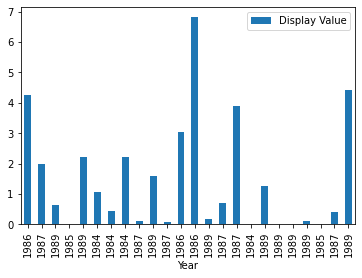

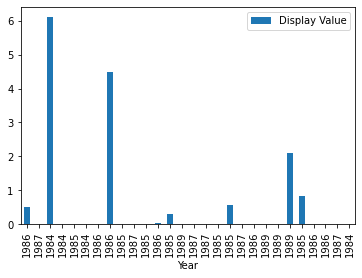

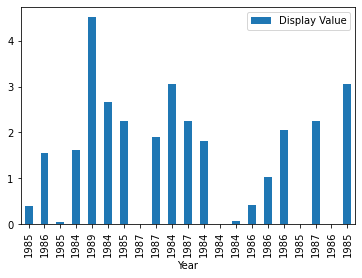

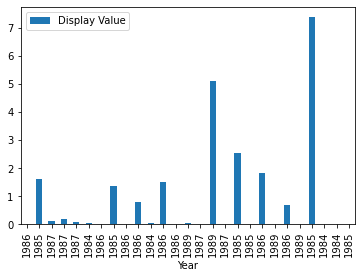

In [29]:
df.groupby('Beverage Types').plot.bar(x="Year")

# 1 e i

In [30]:
colunas = ['Year', 'Beverage Types']
dfFiltrado = df.filter(items=colunas)

dfFiltrado[dfFiltrado['Year'] == 1985]

,Year,Beverage Types
2,1985,Wine
7,1985,Spirits
12,1985,Beer
14,1985,Spirits
24,1985,Other
26,1985,Wine
33,1985,Other
35,1985,Spirits
44,1985,Other
50,1985,Other


# 1 e ii

In [31]:
colunas = ['WHO region', 'Display Value']

dfFiltrado = df.filter(items=colunas)
dfFiltrado[dfFiltrado['Display Value'] > 4]

,WHO region,Display Value
3,Americas,4.27
9,Africa,6.10
21,Americas,4.51
30,Africa,4.48
41,Europe,6.82
57,Europe,5.10
91,Europe,4.43
96,Europe,7.38


# Questão 2

In [32]:
import pandas as pd
import numpy as np

dataFrame = pd.read_csv("https://raw.githubusercontent.com/Neto002/Estacio/main/Big%20Data/trabalho3/cursos-prouni.csv", encoding='utf-8')

dataFrame.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


# 2 a

In [33]:
dataFrame[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']] = dataFrame[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']].replace(np.nan, '0,0')

dataFrame.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,"0,0","0,0"
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,"0,0","0,0","0,0"
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.0,652.22,"0,0","0,0"
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


# 2 b

In [34]:
dataFrame.groupby('grau').first()

,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
grau,,,,,,,,,,,,,,,,,,,
Bacharelado,Integral,9999.99,15.0,14.0,6.0,10.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,"0,0","0,0"
Licenciatura,Matutino,8466.72,1.0,2.0,1.0,21.0,689693216461,Educação Física,Curitiba,PR,NDExMDAzNzA2OTAy,Faculdade Dom Bosco - FDB,UNIDADE MERCÊS - Mercês,689693,Educação Física,579.20,570.4,"0,0","0,0"
Tecnológico,Noturno,4279.28,0.0,1.0,3.0,20.0,100431611227263,Gestão da Tecnologia da Informação,Curitiba,PR,NDExMDAzNzA2OTAy,Faculdade Dom Bosco - FDB,MARUMBY - Lindóia,1004316,Gestão da Tecnologia da Informação,580.68,"0,0","0,0","0,0"


# 2 c

In [35]:
filtroMat = dataFrame[dataFrame.nome == 'Matemática']
filtroMed = dataFrame[dataFrame.nome == 'Medicina']
filtroPed = dataFrame[dataFrame.nome == 'Pedagogia']

dfFiltrado = pd.concat([filtroMat, filtroMed, filtroPed])

dfFiltrado.groupby('nome').first()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
nome,,,,,,,,,,,,,,,,,,,
Matemática,Bacharelado,Integral,4108.00,1.0,20.0,3.0,5.0,6579543108774,Matemática,Rio de Janeiro,RJ,MzMwNjAxODA0NTU3,Pontifícia Universidade Católica do Rio de Jan...,CAMPUS GÁVEA - Gávea,657954,633.44,"0,0","0,0","0,0"
Medicina,Bacharelado,Integral,9999.99,15.0,14.0,6.0,10.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,740.22,726.46,"0,0","0,0"
Pedagogia,Licenciatura,Integral,3282.00,1.0,4.0,1.0,20.0,657954108614,Pedagogia,Rio de Janeiro,RJ,MzMwNjAxODA0NTU3,Pontifícia Universidade Católica do Rio de Jan...,CAMPUS GÁVEA - Gávea,657954,633.50,624.46,"0,0","0,0"


# 2 d

In [36]:
dataFrame.groupby('uf_busca').first()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
uf_busca,,,,,,,,,,,,,,,,,,,
AC,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
AL,Bacharelado,Integral,7290.00,5.0,2.0,3.0,2.0,65986212005784,Medicina,Maceio,MjcwMzAxMTA0MzAy,Centro Universitário Tiradentes - FITS,CAMPUS - MACEIÓ - CRUZ DAS ALMAS - Cruz das A...,659862,Medicina,753.02,735.26,"0,0","0,0"
AM,Bacharelado,Matutino,2127.05,4.0,1.0,6.0,33.0,106053912835781,Odontologia,Manaus,MTMwMzAwNzAyNjAz,Faculdade Uninassau Manaus,FACULDADE SANTA DOROTEIA DO AMAZONAS - Nossa S...,1060539,Odontologia,639.22,628.52,"0,0","0,0"
AP,Bacharelado,Noturno,3607.62,0.0,1.0,2.0,1.0,6591661176713,Odontologia,Macapa,MTYwMjAwMzAwMzAz,Instituto Macapaense de Ensino Superior - IMMES,CAMPUS - MACAPÁ - CENTRO - Centro,659166,Odontologia,690.32,"0,0",620.44,"0,0"
BA,Bacharelado,Integral,9048.00,13.0,4.0,4.0,1.0,10505911785244,Medicina,Lauro de Freitas,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,"0,0","0,0"
CE,Bacharelado,Noturno,9836.40,1.0,2.0,1.0,1.0,104191210567043,Enfermagem,Crateus,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,"0,0","0,0","0,0"
DF,Bacharelado,Integral,6757.92,8.0,7.0,4.0,2.0,25918518354,Medicina,Brasilia,NTMwMTAwMTAwMTA4,Faculdades Integradas da União Educacional do ...,UNIDADE GAMA - Setor Leste Gama,25918,Medicina,745.58,731.24,"0,0","0,0"
ES,Bacharelado,Integral,6022.28,3.0,3.0,3.0,3.0,1866726634,Medicina,Colatina,MzIwMTAwMzAxNTA2,Centro Universitário do Espírito Santo - Unesc...,UNIDADE SEDE - Martinelli,1866,Medicina,"0,0","0,0",750.02,727.0
GO,Bacharelado,Integral,6484.47,3.0,2.0,3.0,4.0,690864844084,Medicina,Goiania,NTIwMzAxMDA4NzA3,Pontifícia Universidade Católica de Goiás - PU...,GOIÂNIA (SEDE) - SETOR UNIVERSITÁRIO,690864,Medicina,763.24,749.98,"0,0","0,0"


# 2 e

In [37]:
dataFrame[dataFrame.grau == 'Tecnológico'].groupby('nome').first()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
nome,,,,,,,,,,,,,,,,,,,
Agroindústria,Tecnológico,Noturno,650.75,1.0,1.0,1.0,3.0,65872413642393,Agroindústria,Marechal Candido Rondon,PR,NDEwNjAyMjE0NjA5,Faculdade de Ensino Superior de Marechal Cândi...,CAMPUS - MARECHAL CÂNDIDO RONDON - CENTRO - C...,658724,570.52,524.8,465.54,484.92
Agronegócio,Tecnológico,Noturno,1112.91,0.0,2.0,2.0,2.0,13774010453563,Agronegócio,Estrela,RS,NDMwNDAyMTA3ODA3,Faculdade de Tecnologia La Salle - Estrela - F...,UNIDADE SEDE - Centro,137740,538.48,"0,0","0,0","0,0"
Agropecuária,Tecnológico,Noturno,1000.48,0.0,4.0,NaN,NaN,22511867903,Agropecuária,Frederico Westphalen,RS,NDMwMTAwMzA4NTA4,Universidade Regional Integrada do Alto Urugua...,CAMPUS DE FREDERICO WESTPHALEN - Itapagé,225,579.02,"0,0","0,0","0,0"
Alimentos,Tecnológico,Noturno,966.33,0.0,1.0,2.0,3.0,252213530863,Alimentos,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS II - LIMOEIRO,2522,547.72,"0,0","0,0","0,0"
Análise e Desenvolvimento de Sistemas,Tecnológico,Noturno,2520.00,0.0,1.0,9.0,20.0,65885813226333,Análise e Desenvolvimento de Sistemas,Curitiba,PR,NDExMDAzNzA2OTAy,Faculdade Anchieta de Ensino Superior do Paran...,UNIDADE SEDE - Cidade Industrial,658858,601.84,"0,0",450.0,"0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tecnólogo em Metalurgia,Tecnológico,Matutino,944.00,2.0,NaN,4.0,1.0,105739312796481,Tecnólogo em Metalurgia,Salvador,BA,MjkwNTAyMTI3NDA4,Faculdade Regional da Bahia - FARB,UNIRB - Patamares,1057393,525.6,"0,0",529.54,450.0
Turismo Receptivo,Tecnológico,Noturno,521.66,2.0,1.0,NaN,NaN,1058402801823,Turismo Receptivo,Belo Horizonte,MG,MzEwNzAzMDA2MjAw,Instituto Belo Horizonte de Ensino Superior - ...,BARRO PRETO - Barro Preto,1058402,578.5,503.84,"0,0","0,0"
Visagismo e Terapias Capilares,Tecnológico,Integral,1228.00,4.0,7.0,NaN,NaN,25031066584,Visagismo e Terapias Capilares,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Anhembi Morumbi - UAM,CAMPUS MOOCA - Brás,2503,564.12,526.54,"0,0","0,0"


# 2 f

In [38]:
dataFrame.drop('cidade_filtro', axis=1, inplace=True)

dataFrame

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,"0,0","0,0"
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,"0,0","0,0","0,0"
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.0,652.22,"0,0","0,0"
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,Licenciatura,Curso a Distância,149.00,1.0,NaN,NaN,NaN,994312865605,Sociologia,Paraiso do Tocantins,TO,Universidade Paulista - UNIP,PARAISO DO TOCANTINS - Centro,9943,Sociologia,502.36,"0,0","0,0","0,0"
41443,Tecnológico,Curso a Distância,144.00,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.0,450.0,450.0
41444,Tecnológico,Vespertino,139.00,1.0,NaN,NaN,NaN,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,"0,0","0,0","0,0"
41445,Bacharelado,Curso a Distância,139.00,1.0,NaN,NaN,NaN,96781210935,Serviço Social,Vitoria,ES,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,"0,0","0,0","0,0"


# 2 g

In [39]:
dfFiltrado = dataFrame[dataFrame['nome'] == 'Medicina']

print(f"Média da mensalidade do curso de Medicina: R${dfFiltrado['mensalidade'].mean():.2f}")

Média da mensalidade do curso de Medicina: R$7168.34


# 2 h

In [40]:
dfFiltrado = dataFrame
dfFiltrado[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']] = dfFiltrado[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']].replace('0,0', 0.0)
dfFiltrado = dfFiltrado[dfFiltrado['turno'] == 'Integral']

print(f"Média das notas dos cursos de tempo integral: {dfFiltrado['nota_integral_ampla'].mean():.2f}")

Média das notas dos cursos de tempo integral: 605.08


# 2 i

In [41]:
dfFiltrado = dataFrame[dataFrame.grau == 'Bacharelado'].filter(items=['grau', 'nota_integral_ampla'])

dfFiltrado.groupby('grau').describe()

nota_integral_ampla                                              \
                          count       mean         std  min     25%     50%   
grau                                                                          
Bacharelado             19165.0  500.68757  230.945314  0.0  543.48  594.28   

                           
               75%    max  
grau                       
Bacharelado  627.5  781.2

# 2 j

<AxesSubplot:xlabel='grau'>

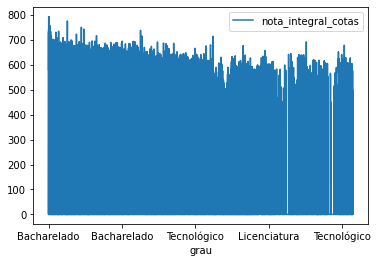

In [42]:
dfFiltrado = dataFrame.filter(['grau', 'nota_integral_cotas'])
dfFiltrado.plot.line(x='grau')